In [3]:
import pandas as pd

df_result = pd.read_csv("../datasets/backtest_new_0823_label.csv")
df_result["date"] = pd.to_datetime(df_result["date"])

df = pd.read_csv("../datasets/stock_20200821.csv")
df["trade_date"] = df["trade_date"].apply(lambda x: str(x))
df["trade_date"] = pd.to_datetime((df["trade_date"]))

df = df.groupby("trade_date")["pct_chg"].mean()

df = pd.merge(df_result, df, left_on="date", right_index=True, how="left")
df.head()

,date,return,stock,stock_num,train_score,test_score,pct_chg
0,2015-01-05,0.024087,['000651.SZ'],1,0.731251,0.446154,0.022993
1,2015-01-06,0.000000,[],0,0.760692,0.443940,0.024241
2,2015-01-07,0.037755,"['601299.SH', '601727.SH']",2,0.761185,0.430066,0.012540
3,2015-01-08,0.000000,[],0,0.767341,0.459582,0.002841
4,2015-01-09,0.000000,[],0,0.785547,0.472000,-0.017880


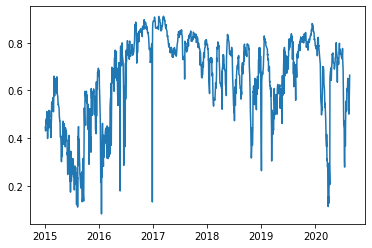

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(df["date"], df["test_score"])
plt.show()

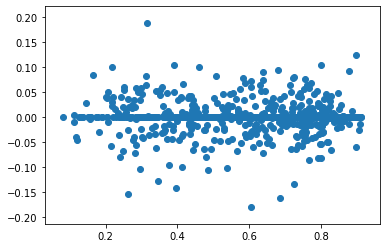

In [7]:
plt.scatter(df["test_score"], df["return"])
plt.show()

In [8]:
import numpy as np

np.corrcoef(df["test_score"], df["return"])

array([[1.        , 0.00124911],
       [0.00124911, 1.        ]])

(array([355.,  16.,  10.,   3.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,
          1.,   1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.]),
 array([  1.  ,  10.75,  20.5 ,  30.25,  40.  ,  49.75,  59.5 ,  69.25,
         79.  ,  88.75,  98.5 , 108.25, 118.  , 127.75, 137.5 , 147.25,
        157.  , 166.75, 176.5 , 186.25, 196.  ]),
 <a list of 20 Patch objects>)

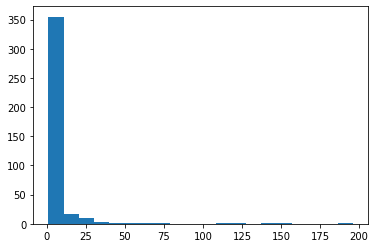

In [12]:
plt.hist(df.loc[df["stock_num"] > 0, "stock_num"], 20)

In [13]:
len(df[df["return"] > 0])

200

In [14]:
len(df[df["return"] < 0])

190

In [17]:
print(df[df["return"] > 0].mean())
print(df[df["return"] < 0].mean())

return         0.030500
stock_num      9.535000
train_score    0.808016
test_score     0.577218
pct_chg       -0.003037
dtype: float64
return        -0.033732
stock_num      4.305263
train_score    0.818117
test_score     0.589121
pct_chg        0.000717
dtype: float64
